## Лабораторная работа 3
### Нагаев Алексей 20-ИВТ-3, вариант 40

Цель лабораторной работы – получение навыков работы с методами классификации.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Набор данных:
Индетификатор класса: Class<br>
Алкоголь: Alcohol<br>
Яблочная кислота: Malic acid<br>
Зола: Ash<br>
Щелочность золы: Alcalinity of ash<br>
Магний: Magnesium<br>
Общие фенолы: Total phenols<br>
Флаваноиды: Flavanoids<br>
Нефлаваноидные фенолы: Nonflavanoid phenols<br>
Проантоцианы: Proanthocyanins<br>
Интенсивность цвета: Color intensity<br>
Оттенок: Hue<br>
OD280/OD315 разбавленных вин: OD280/OD315 of diluted wines<br>
Пролин: Proline

In [1532]:
import numpy as np
import pandas as pd

In [1533]:
# Считываем данные и называем колонки
data = pd.read_csv('wine.data.txt')
data.columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash',
                'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
                'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
                'Color_intensity', 'Hue', 'OD280/OD315', 'Proline']

data

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Удаление дупликатов

In [1534]:
# До
print(data.shape)

data = data.drop_duplicates()

# После
print(data.shape)

(177, 14)
(177, 14)


Оценка сбалансированности по классам

<AxesSubplot:xlabel='Class'>

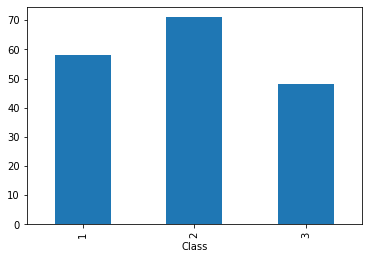

In [1535]:
data.groupby('Class').count()[data.columns[1]].plot(kind='bar')

Масштабирование количественных признаков

<AxesSubplot:>

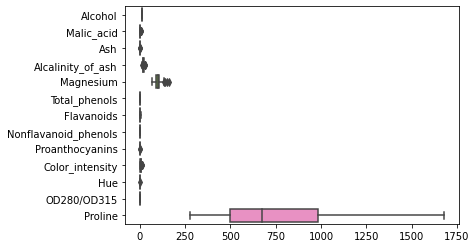

In [1536]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# До масштабирования
sns.boxplot(data = data.drop(labels = 'Class', axis=1), orient = 'h')

<AxesSubplot:>

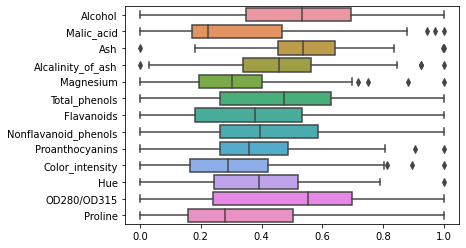

In [1537]:
# Масштабируем все, кроме Class
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
normalized_data["Class"] = data.Class

# После
sns.boxplot(data = normalized_data.drop(labels='Class', axis=1), orient='h')

Замена категориальных признаков

In [1538]:
from sklearn.preprocessing import OneHotEncoder

#sparce - нужна ли разряженная матрица, а то нулей то много будет
Encoder = OneHotEncoder(sparse=False)
n_Encoder = Encoder.fit_transform(normalized_data.Class.values.reshape(-1, 1))

tmp_df = pd.DataFrame(n_Encoder, columns=['Class=' + str(i) for i in range(n_Encoder.shape[1])])
new_df = pd.concat([data, tmp_df], axis = 1)

new_df.drop('Class', axis = 1, inplace = True)
new_df.dropna(how = 'any', inplace = True)
new_df

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline,Class=0,Class=1,Class=2
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1.0,0.0,0.0
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1.0,0.0,0.0
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1.0,0.0,0.0
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.0,0.0,0.0
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0.0,0.0,1.0
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0.0,0.0,1.0
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0.0,0.0,1.0
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0.0,0.0,1.0


Оценка корреляции между признаками

<AxesSubplot:>

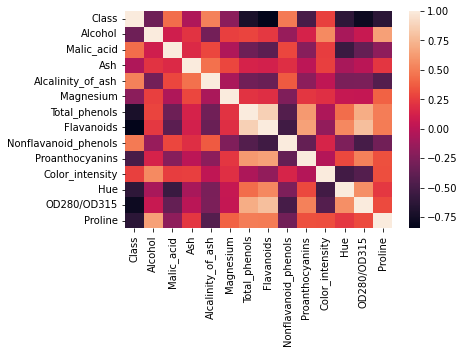

In [1539]:
corr = normalized_data.corr()
sns.heatmap(data=corr)

Заполнение пропущенных данных 

In [1540]:
normalized_data.isnull().sum()

Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

Решение задачи классификации

Классификатор K ближайших соседей, задаётся радиус для выбора ближайших объектов

In [1541]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [1542]:
# Помещаем в x выборку
x = normalized_data.drop(labels='Class', axis=1)

# Помещаем в y "метки"
y = normalized_data['Class']

# делим выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [1543]:
rnc = RadiusNeighborsClassifier()
grid_rnc = GridSearchCV(rnc, {'radius': np.arange(0.5, 15, 0.01)}, n_jobs = -1)

#Ищем лучший радиус и кладем его в best_rnc_radius
grid_rnc.fit(x_train, y_train)
best_radius_rnc = grid_rnc.best_estimator_.radius
best_score_rnc = grid_rnc.best_score_

score_rnc = grid_rnc.cv_results_["mean_test_score"]
params_rnc = grid_rnc.cv_results_["params"]

for s, p in zip(score_rnc, params_rnc):
    print(s, p)


nan {'radius': 0.5}
nan {'radius': 0.51}
nan {'radius': 0.52}
nan {'radius': 0.53}
nan {'radius': 0.54}
nan {'radius': 0.55}
nan {'radius': 0.56}
nan {'radius': 0.5700000000000001}
nan {'radius': 0.5800000000000001}
nan {'radius': 0.5900000000000001}
nan {'radius': 0.6000000000000001}
nan {'radius': 0.6100000000000001}
nan {'radius': 0.6200000000000001}
nan {'radius': 0.6300000000000001}
nan {'radius': 0.6400000000000001}
nan {'radius': 0.6500000000000001}
nan {'radius': 0.6600000000000001}
nan {'radius': 0.6700000000000002}
nan {'radius': 0.6800000000000002}
nan {'radius': 0.6900000000000002}
nan {'radius': 0.7000000000000002}
nan {'radius': 0.7100000000000002}
nan {'radius': 0.7200000000000002}
nan {'radius': 0.7300000000000002}
nan {'radius': 0.7400000000000002}
nan {'radius': 0.7500000000000002}
nan {'radius': 0.7600000000000002}
nan {'radius': 0.7700000000000002}
nan {'radius': 0.7800000000000002}
nan {'radius': 0.7900000000000003}
nan {'radius': 0.8000000000000003}
0.957389162561

In [1544]:
# создаем классификатор с лучшим радиусом
rnc_best = RadiusNeighborsClassifier(radius = best_radius_rnc)
rnc_best.fit(x_train, y_train)

prediction_rnc = rnc_best.predict(x_test)

print("Best radius:", best_radius_rnc)
print("Accuracy:", accuracy_score(y_test, prediction_rnc))
print("Best score:", best_score_rnc)

Best radius: 0.8100000000000003
Accuracy: 0.9722222222222222
Best score: 0.9573891625615765


Логический классификатор

In [1545]:
dtc = DecisionTreeClassifier()
grid_params_dtc = {'max_depth': range(1, 30), 'max_features': range(1, 15), 'criterion':('gini', 'entropy')}
grid_dtc = GridSearchCV(dtc, grid_params_dtc, n_jobs = -1)

grid_dtc.fit(x_train, y_train)
best_score_dtc = grid_dtc.best_score_
best_params_dtc = grid_dtc.best_params_

score_dtc = grid_dtc.cv_results_["mean_test_score"]
params_dtc = grid_dtc.cv_results_["params"]

for s, p in zip(score_dtc, params_dtc):
    print(s, p)


0.5381773399014779 {'criterion': 'gini', 'max_depth': 1, 'max_features': 1}
0.6238916256157635 {'criterion': 'gini', 'max_depth': 1, 'max_features': 2}
0.5886699507389161 {'criterion': 'gini', 'max_depth': 1, 'max_features': 3}
0.5467980295566501 {'criterion': 'gini', 'max_depth': 1, 'max_features': 4}
0.5743842364532019 {'criterion': 'gini', 'max_depth': 1, 'max_features': 5}
0.5881773399014778 {'criterion': 'gini', 'max_depth': 1, 'max_features': 6}
0.6096059113300492 {'criterion': 'gini', 'max_depth': 1, 'max_features': 7}
0.6667487684729064 {'criterion': 'gini', 'max_depth': 1, 'max_features': 8}
0.5958128078817734 {'criterion': 'gini', 'max_depth': 1, 'max_features': 9}
0.5958128078817734 {'criterion': 'gini', 'max_depth': 1, 'max_features': 10}
0.5958128078817734 {'criterion': 'gini', 'max_depth': 1, 'max_features': 11}
0.5958128078817734 {'criterion': 'gini', 'max_depth': 1, 'max_features': 12}
0.5958128078817734 {'criterion': 'gini', 'max_depth': 1, 'max_features': 13}
nan {'cr

In [1546]:
dtc_best = DecisionTreeClassifier(criterion=best_params_dtc["criterion"], 
                                  max_depth=best_params_dtc["max_depth"], 
                                  max_features=best_params_dtc["max_features"])

dtc_best.fit(x_train, y_train)

prediction_dtc = dtc_best.predict(x_test)

print("Grid best params:", best_params_dtc)
print("Accuracy:", accuracy_score(y_test, prediction_dtc))
print("Best score:", best_score_dtc)


Grid best params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 5}
Accuracy: 0.9444444444444444
Best score: 0.9716748768472907


Кривые

In [1547]:
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

y_test_inversion = [1-y for y in y_test]
n_classes = len(set(y))

Y = label_binarize(data['Class'], classes=[*range(1, n_classes + 1)])

X_train, X_test, y_train, y_test = train_test_split(x, Y, random_state=0, test_size=0.2)

ovr_rnc = OneVsRestClassifier(rnc_best)
ovr_dtc = OneVsRestClassifier(dtc_best)
ovr_rnc.fit(X_train, y_train)
ovr_dtc.fit(X_train, y_train)

prob_rnc = ovr_rnc.predict_proba(X_test)
prob_dtc = ovr_dtc.predict_proba(X_test)

print(prob_rnc)
print(prob_dtc)

[[0.85714286 0.14285714 0.        ]
 [0.         0.         1.        ]
 [0.07692308 0.84615385 0.07692308]
 [0.93478261 0.06521739 0.        ]
 [0.16666667 0.83333333 0.        ]
 [0.17391304 0.73913043 0.08695652]
 [0.97674419 0.02325581 0.        ]
 [0.         0.09302326 0.90697674]
 [0.03448276 0.63793103 0.32758621]
 [0.         0.75510204 0.24489796]
 [0.         0.02564103 0.97435897]
 [0.         0.06896552 0.93103448]
 [1.         0.         0.        ]
 [0.14285714 0.85714286 0.        ]
 [0.         0.07317073 0.92682927]
 [0.44       0.56       0.        ]
 [0.67213115 0.32786885 0.        ]
 [0.86666667 0.13333333 0.        ]
 [0.29411765 0.66666667 0.03921569]
 [0.97560976 0.02439024 0.        ]
 [0.19565217 0.80434783 0.        ]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]
 [0.         0.88461538 0.11538462]
 [0.         0.44444444 0.55555556]
 [0.08       0.72       0.2       ]
 [0.04545455 0.77272727 0.18181818]
 [0.08108108 0.91891892 0.  

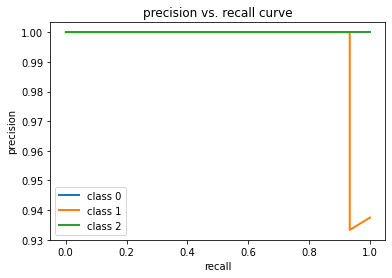

In [1548]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        prob_rnc[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

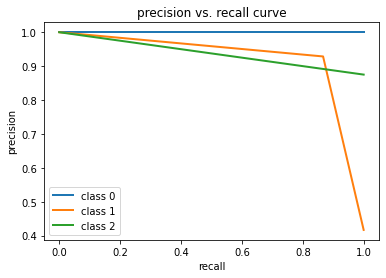

In [1549]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        prob_dtc[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

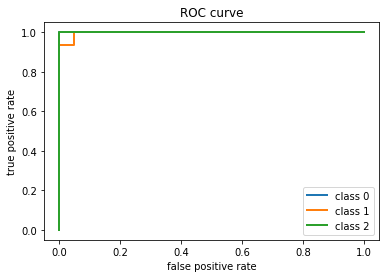

In [1550]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  prob_rnc[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

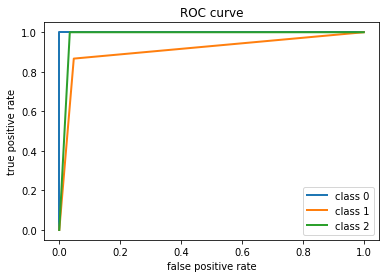

In [1551]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  prob_dtc[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()